In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
df=pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Getting Know the Data**

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.shape

(5110, 12)

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [8]:
df.describe(include="object").T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


**Data Visualization and Analysis**

In [9]:
# Drop the unnecessary column
df.dropna(inplace=True)
df.drop(columns=["id"],axis=1, inplace=True)

In [10]:
df["gender"].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [11]:
df.loc[df["gender"]=="Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [12]:
df.drop([3116], inplace=True)

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

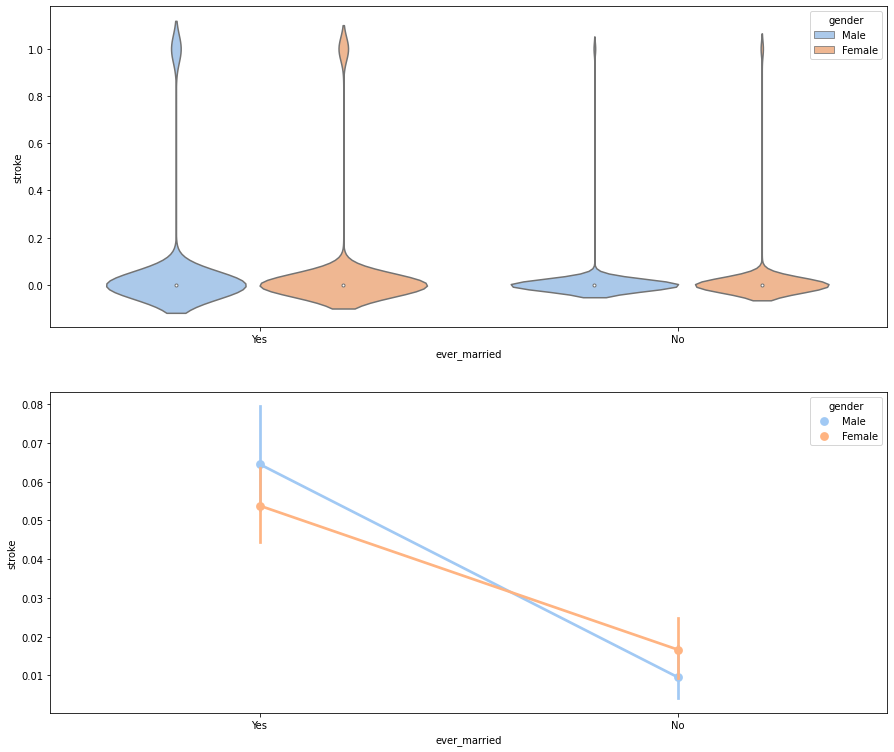

In [13]:
fig, axis=plt.subplots(2, figsize=(15,13))
sns.set_palette("pastel")


sns.violinplot(data=df, x=df["ever_married"], y=df["stroke"], hue=df["gender"],
           ax=axis[0])

sns.pointplot(data=df, x=df["ever_married"], y=df["stroke"], hue=df["gender"],
           ax=axis[1])

<AxesSubplot:xlabel='work_type', ylabel='stroke'>

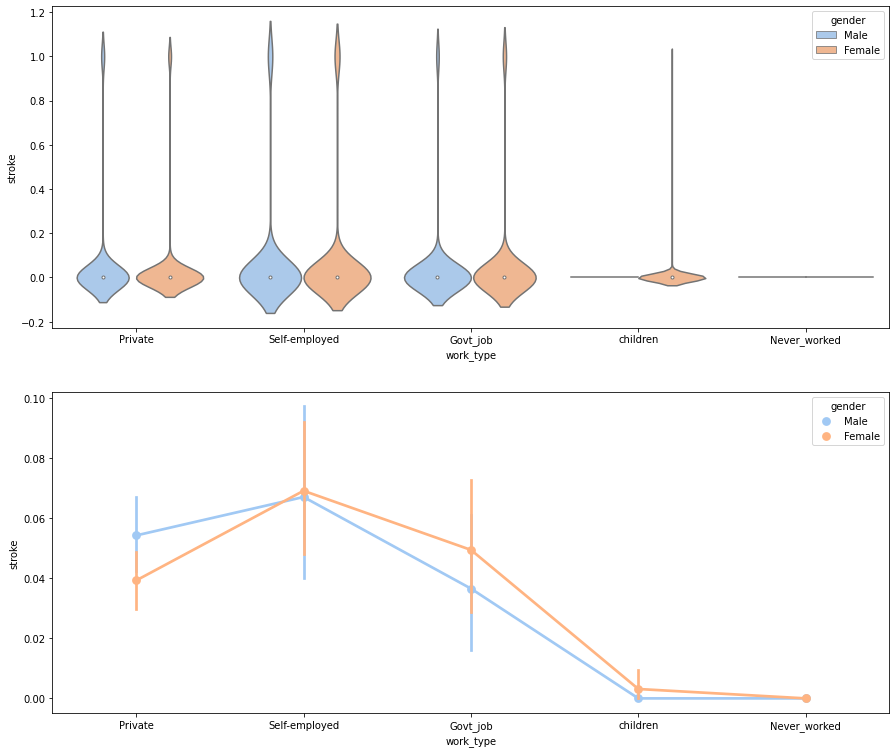

In [14]:
fig, axis=plt.subplots(2, figsize=(15,13))
sns.set_palette("pastel")


sns.violinplot(data=df, x=df["work_type"], y=df["stroke"], hue=df["gender"],
           ax=axis[0])

sns.pointplot(data=df, x=df["work_type"], y=df["stroke"], hue=df["gender"],
           ax=axis[1])

In [15]:
# Never worked data consist of children. That's why there are no stroke.
df.loc[df["work_type"]=="Never_worked"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
603,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0
886,Female,19.0,0,0,No,Never_worked,Urban,86.96,25.8,never smoked,0
939,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
959,Male,17.0,0,0,No,Never_worked,Urban,113.25,23.4,never smoked,0
1462,Male,17.0,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0
1789,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
1922,Male,16.0,0,0,No,Never_worked,Urban,59.99,28.2,never smoked,0
2346,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
2721,Female,17.0,0,0,No,Never_worked,Rural,88.57,31.1,never smoked,0


<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

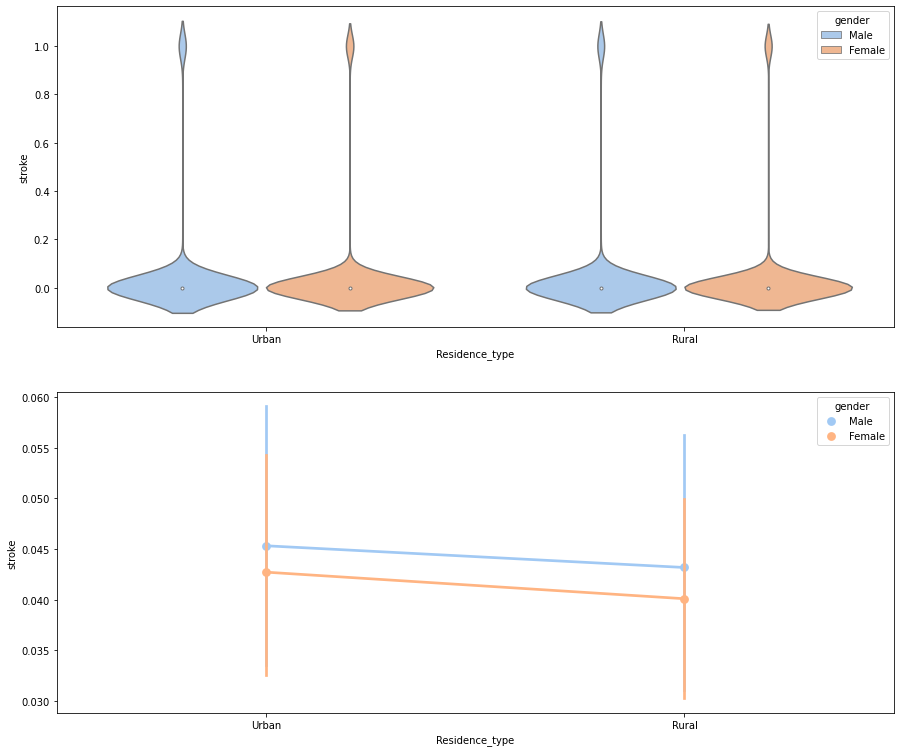

In [16]:
fig, axis=plt.subplots(2, figsize=(15,13))
sns.set_palette("pastel")


sns.violinplot(data=df, x=df["Residence_type"], y=df["stroke"], hue=df["gender"],
           ax=axis[0])

sns.pointplot(data=df, x=df["Residence_type"], y=df["stroke"], hue=df["gender"],
           ax=axis[1])

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

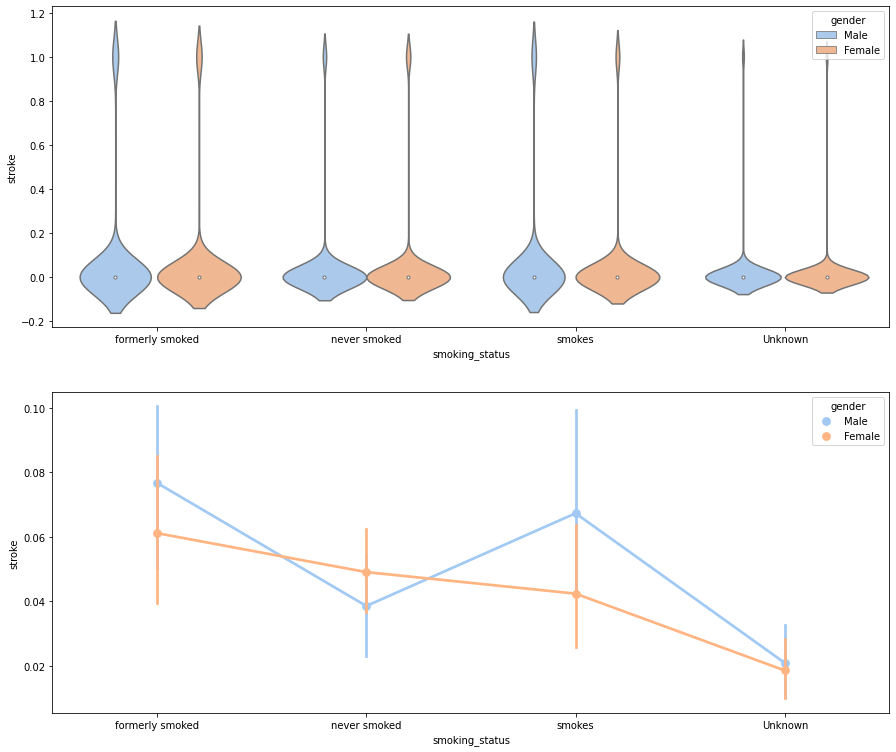

In [17]:
fig, axis=plt.subplots(2, figsize=(15,13))
sns.set_palette("pastel")

sns.violinplot(data=df, x=df["smoking_status"], y=df["stroke"], hue=df["gender"],
           ax=axis[0])

sns.pointplot(data=df, x=df["smoking_status"], y=df["stroke"], hue=df["gender"],
           ax=axis[1])

In [18]:
df_categorical=["ever_married","work_type","Residence_type","smoking_status"]
for i in df_categorical:
    print(df[i].value_counts())

Yes    3204
No     1704
Name: ever_married, dtype: int64
Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
Urban    2490
Rural    2418
Name: Residence_type, dtype: int64
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64


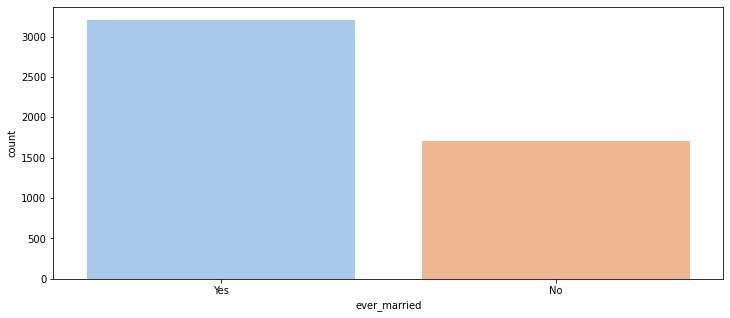

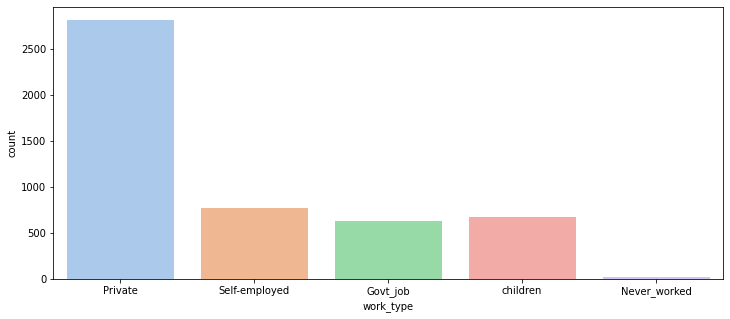

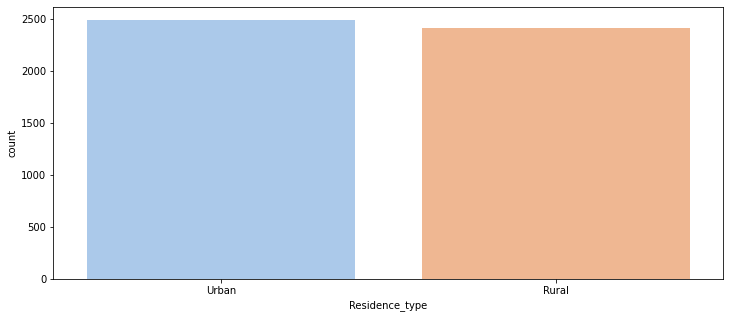

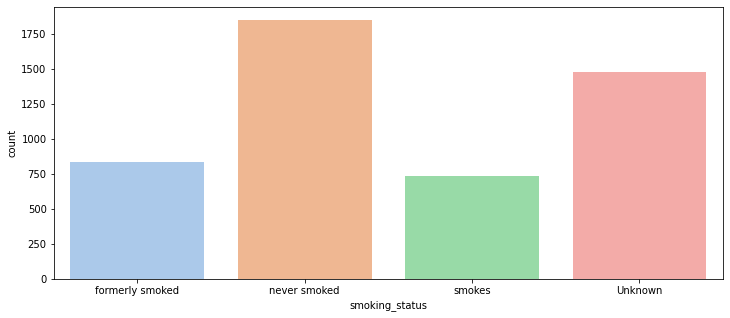

In [19]:
for i in df_categorical:
    plt.figure(figsize=(12,5))
    sns.countplot(x=df[i])
    plt.show()

**Creating Some New Columns**

In [20]:
def Age(age):
    if (age>=0 and age<18): return "Child"
    if (age>=18 and age<44): return "Adult"
    if (age>=44 and age<60): return "Late Adult"
    if (age>=60 and age<82): return "Old"

df["age_gap"]=df.apply(lambda x: Age(x["age"]),axis=1)

df.drop(columns=["age"],axis=1,inplace=True)

In [21]:
df.age_gap.value_counts()

Adult         1554
Late Adult    1233
Old           1230
Child          836
Name: age_gap, dtype: int64

In [22]:
def BMI(bmi):
    if (bmi>=0 and bmi<18): return "Underweight"
    if (bmi>=18 and bmi<25): return "Normal_weight"
    if (bmi>=25 and bmi<29): return "Overweight"
    if (bmi>30): return "Obesity"

df["bmi_gap"]=df.apply(lambda x: BMI(x["bmi"]),axis=1)

df.drop(columns=["bmi"],axis=1,inplace=True)

In [23]:
def Glucose(avg_glucose_level):
    if (avg_glucose_level>=0 and avg_glucose_level<145): return "Good"
    if (avg_glucose_level>=145 and avg_glucose_level<200): return "Okay"
    if (avg_glucose_level>=200): return "Bad"

df["Glucose"]=df.apply(lambda x: Glucose(x["avg_glucose_level"]),axis=1)

df.drop(columns=["avg_glucose_level"],axis=1,inplace=True)

<AxesSubplot:xlabel='Glucose', ylabel='stroke'>

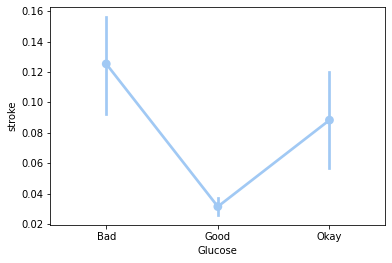

In [24]:
sns.pointplot(x=df["Glucose"],y=df["stroke"])

In [25]:
# Dummy variable
one_hot_encoded_data=pd.get_dummies(df, columns=["gender","ever_married",
                                                 "work_type","Residence_type",
                                                "smoking_status","age_gap",
                                                "bmi_gap","Glucose"])
one_hot_encoded_data

,hypertension,heart_disease,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,age_gap_Child,age_gap_Late Adult,age_gap_Old,bmi_gap_Normal_weight,bmi_gap_Obesity,bmi_gap_Overweight,bmi_gap_Underweight,Glucose_Bad,Glucose_Good,Glucose_Okay
0,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,0,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,1,0,1,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5,0,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5106,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5107,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5108,0,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [26]:
df=pd.concat([df,one_hot_encoded_data], axis=1)
df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age_gap,bmi_gap,...,age_gap_Child,age_gap_Late Adult,age_gap_Old,bmi_gap_Normal_weight,bmi_gap_Obesity,bmi_gap_Overweight,bmi_gap_Underweight,Glucose_Bad,Glucose_Good,Glucose_Okay
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,Old,Obesity,...,0,0,1,0,1,0,0,1,0,0
2,Male,0,1,Yes,Private,Rural,never smoked,1,Old,Obesity,...,0,0,1,0,1,0,0,0,1,0
3,Female,0,0,Yes,Private,Urban,smokes,1,Late Adult,Obesity,...,0,1,0,0,1,0,0,0,0,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,Old,Normal_weight,...,0,0,1,1,0,0,0,0,0,1
5,Male,0,0,Yes,Private,Urban,formerly smoked,1,Old,None,...,0,0,1,0,0,0,0,0,0,1


In [27]:
df.drop(columns=["gender","ever_married","work_type",
                 "Residence_type",
                "smoking_status","age_gap",
                "bmi_gap","Glucose"], axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   hypertension                    4908 non-null   int64
 1   heart_disease                   4908 non-null   int64
 2   stroke                          4908 non-null   int64
 3   hypertension                    4908 non-null   int64
 4   heart_disease                   4908 non-null   int64
 5   stroke                          4908 non-null   int64
 6   gender_Female                   4908 non-null   uint8
 7   gender_Male                     4908 non-null   uint8
 8   ever_married_No                 4908 non-null   uint8
 9   ever_married_Yes                4908 non-null   uint8
 10  work_type_Govt_job              4908 non-null   uint8
 11  work_type_Never_worked          4908 non-null   uint8
 12  work_type_Private               4908 non-null   uint8
 13  wor

In [29]:
# I realized that there are some duplicated columns. We need to get rid of that.
df=df.T.drop_duplicates().T
df.head()

,hypertension,heart_disease,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,age_gap_Child,age_gap_Late Adult,age_gap_Old,bmi_gap_Normal_weight,bmi_gap_Obesity,bmi_gap_Overweight,bmi_gap_Underweight,Glucose_Bad,Glucose_Good,Glucose_Okay
0,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,0,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,1,0,1,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5,0,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   hypertension                    4908 non-null   int64
 1   heart_disease                   4908 non-null   int64
 2   stroke                          4908 non-null   int64
 3   gender_Female                   4908 non-null   int64
 4   gender_Male                     4908 non-null   int64
 5   ever_married_No                 4908 non-null   int64
 6   ever_married_Yes                4908 non-null   int64
 7   work_type_Govt_job              4908 non-null   int64
 8   work_type_Never_worked          4908 non-null   int64
 9   work_type_Private               4908 non-null   int64
 10  work_type_Self-employed         4908 non-null   int64
 11  work_type_children              4908 non-null   int64
 12  Residence_type_Rural            4908 non-null   int64
 13  Res

<AxesSubplot:xlabel='count', ylabel='stroke'>

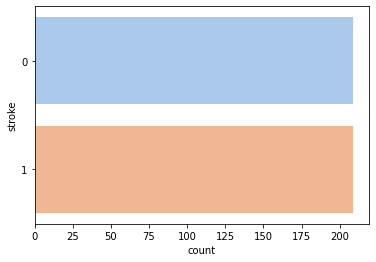

In [31]:
# Stroke=0 values are much more than Stroke=1 values. We need to balance this to increase our model accuracy 
count_class_0, count_class_1=df["stroke"].value_counts()

df_class_0 = df[df['stroke'] == 0]
df_class_1 = df[df['stroke'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_new = pd.concat([df_class_0_under, df_class_1], axis=0)

sns.countplot(data=df_new, y=df_new["stroke"])

In [32]:
y=df_new["stroke"]
x=df_new.drop(columns=["stroke"],axis=1)
y=pd.DataFrame(y)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [34]:
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(292, 1)
(292, 28)
(126, 1)
(126, 28)


In [35]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics


logr=LogisticRegression(random_state=0)
logr.fit(X_train,y_train)
y_pred=logr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)


print(cm)
print("Training Accuracy :", logr.score(X_train, y_train)*100)
print("Testing Accuracy :", logr.score(X_test, y_test)*100)

[[45 22]
 [10 49]]
Training Accuracy : 77.05479452054794
Testing Accuracy : 74.60317460317461


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [37]:
from sklearn.svm import SVC
svc=SVC(kernel="poly")
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

print(cm)
print("Training Accuracy :", svc.score(X_train, y_train)*100)
print("Testing Accuracy :", svc.score(X_test, y_test)*100)

[[35 32]
 [ 9 50]]
Training Accuracy : 83.9041095890411
Testing Accuracy : 67.46031746031747


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)

y_pred=dtc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

print(cm)
print("Training Accuracy :", dtc.score(X_train, y_train)*100)
print("Testing Accuracy :", dtc.score(X_test, y_test)*100)

[[44 23]
 [23 36]]
Training Accuracy : 96.23287671232876
Testing Accuracy : 63.49206349206349


**PCA**

In [39]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [40]:
logr=LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

print(cm)
print("Training Accuracy :", logr.score(X_train, y_train)*100)
print("Testing Accuracy :", logr.score(X_test, y_test)*100)

[[52 15]
 [12 47]]
Training Accuracy : 65.75342465753424
Testing Accuracy : 78.57142857142857


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [41]:
from sklearn.svm import SVC
svc=SVC(kernel="poly")
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

print(cm)
print("Training Accuracy :", svc.score(X_train, y_train)*100)
print("Testing Accuracy :", svc.score(X_test, y_test)*100)

[[28 39]
 [ 5 54]]
Training Accuracy : 67.46575342465754
Testing Accuracy : 65.07936507936508


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Training Accuracy :", dtc.score(X_train, y_train)*100)
print("Testing Accuracy :", dtc.score(X_test, y_test)*100)

[[44 23]
 [18 41]]
Training Accuracy : 96.23287671232876
Testing Accuracy : 67.46031746031747
